In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

### LOADING PROCESSED DATA

In [4]:
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '../..'))
PROCESSED_DATA_PATH = os.path.join(BASE_DIR, 'data', 'processed')

In [5]:
X_train = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, 'X_train.csv'))
X_test = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, 'X_test.csv'))
y_train = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, 'y_train.csv'))
y_test = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, 'y_test.csv'))

print(f"Data Loaded! Input Shape: {X_train.shape}")

Data Loaded! Input Shape: (5634, 30)


### BUILDING THE NEURAL NETWORK

Use a Sequential model (layers stacked on top of each other)

In [6]:
model = Sequential()

Input Layer + 1st Hidden Layer
1. units=32: Number of neurons (try 16, 32, 64)
2. activation='relu': Standard for hidden layers
3. input_dim=X_train.shape[1]: telling the model how many features to expect (approx 30)

Output Layer
1. units=1: We want ONE number (probability of churn)
2. activation='sigmoid': Squashes the output between 0 and 1

In [7]:
model.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2)) # Prevents overfitting by randomly turning off 20% of neurons

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.2))

In [9]:
model.add(Dense(units=1, activation='sigmoid'))

Compile the model
1. loss='binary_crossentropy': The standard loss for Yes/No problems
2. optimizer='adam': The smart algorithm that adjusts learning rate automatically

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print("[SUCCESS] Model Architecture Created")
model.summary()

[SUCCESS] Model Architecture Created


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,537 (6.00 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

### TRAINING

In [11]:
# EarlyStopping prevents "overtraining". If validation loss stops improving, it stops.
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [12]:
print("[INFO] Starting Training...")

history = model.fit(
    x=X_train, 
    y=y_train, 
    epochs=100,          # Maximum epochs (it will stop early though)
    batch_size=32,       # How many rows to look at before updating weights
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

[INFO] Starting Training...
Epoch 1/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7593 - loss: 0.4865 - val_accuracy: 0.7807 - val_loss: 0.4420
Epoch 2/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.7851 - loss: 0.4488 - val_accuracy: 0.7928 - val_loss: 0.4354
Epoch 3/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.7900 - loss: 0.4380 - val_accuracy: 0.7921 - val_loss: 0.4335
Epoch 4/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.7886 - loss: 0.4394 - val_accuracy: 0.7928 - val_loss: 0.4310
Epoch 5/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.7945 - loss: 0.4337 - val_accuracy: 0.7949 - val_loss: 0.4287
Epoch 6/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.7978 - loss: 0.4322 - val_accuracy: 0.7857 - val_loss: 0.4310
Epoch 7/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.7968 - loss: 0.4274 - val_accuracy: 0.7913 - val_loss: 0.4278
Epoch 8/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - 

### VISUALIZING TRAINING PERFORMANCE

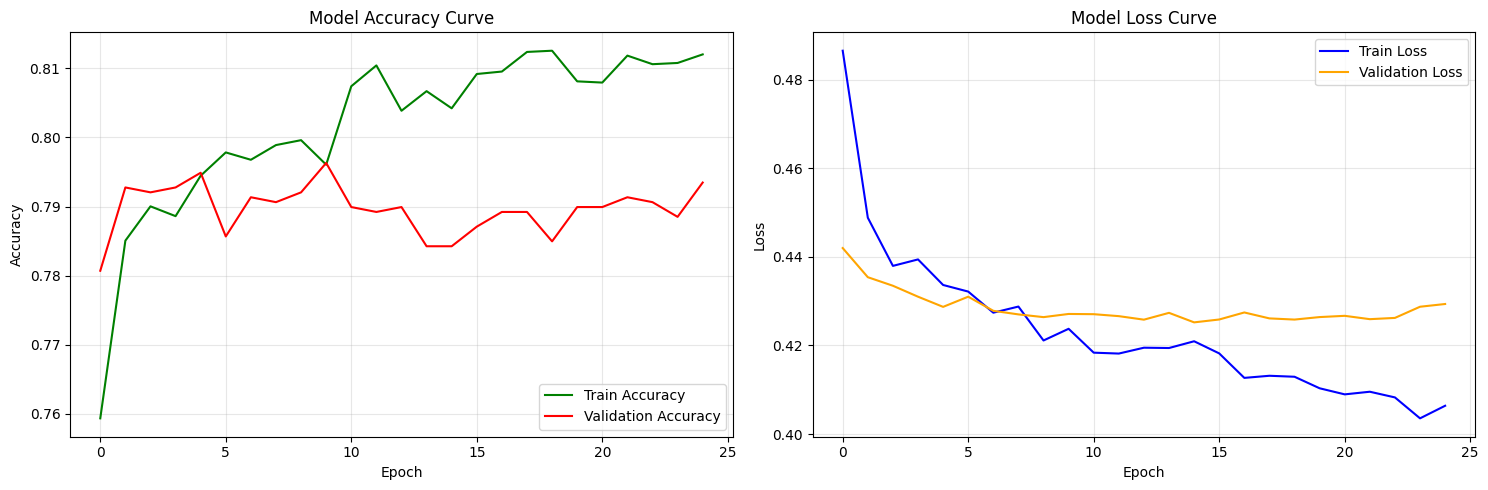

In [13]:
# create a dataframe from the training history
history_df = pd.DataFrame(history.history)

# figure with 2 subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Model Accuracy Curve
ax1.plot(history_df['accuracy'], label='Train Accuracy', color='green')
ax1.plot(history_df['val_accuracy'], label='Validation Accuracy', color='red')
ax1.set_title('Model Accuracy Curve')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3)

# Plot 2: Model Loss Curve
ax2.plot(history_df['loss'], label='Train Loss', color='blue')
ax2.plot(history_df['val_loss'], label='Validation Loss', color='orange')
ax2.set_title('Model Loss Curve')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### INFERENCE TESTING

In [14]:
print("[INFO] Generating predictions...")

# getting raw probabilities (numbers between 0 and 1)
y_prob = model.predict(X_test)

# convert to class labels (0 or 1) based on 0.5 threshold
# if probability > 0.5, they are "Churn" (1)
y_pred = (y_prob > 0.5).astype("int32")

print("[INFO] Predictions generated.")

[INFO] Generating predictions...
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step
[INFO] Predictions generated.


### DETAILED EVALUATION

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc

In [16]:
print("[INFO] Neural Network Classification Report: \n")
print(classification_report(y_test, y_pred))

[INFO] Neural Network Classification Report: 

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.65      0.47      0.55       374

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



`What percentage of churners did we actually catch? 55%?     `

In [17]:
# Calculate accuracy on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Neural Network Test Accuracy: {accuracy:.4f}")

Neural Network Test Accuracy: 0.7935


### CONFUSION MATRIX

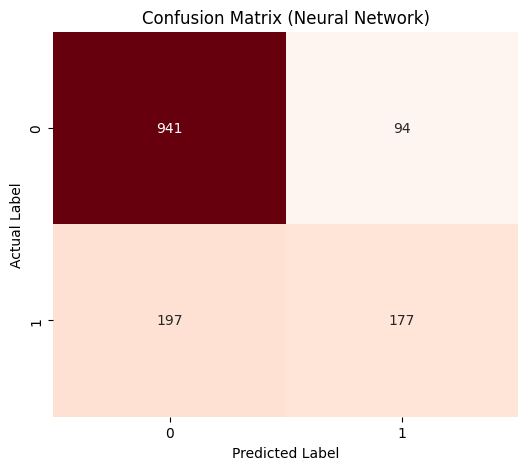

In [18]:
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)

# Using 'Reds' to distinguish from the Blue Decision Tree
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False) 
plt.title('Confusion Matrix (Neural Network)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

### ROC AND PRECISION RECALL CURVES

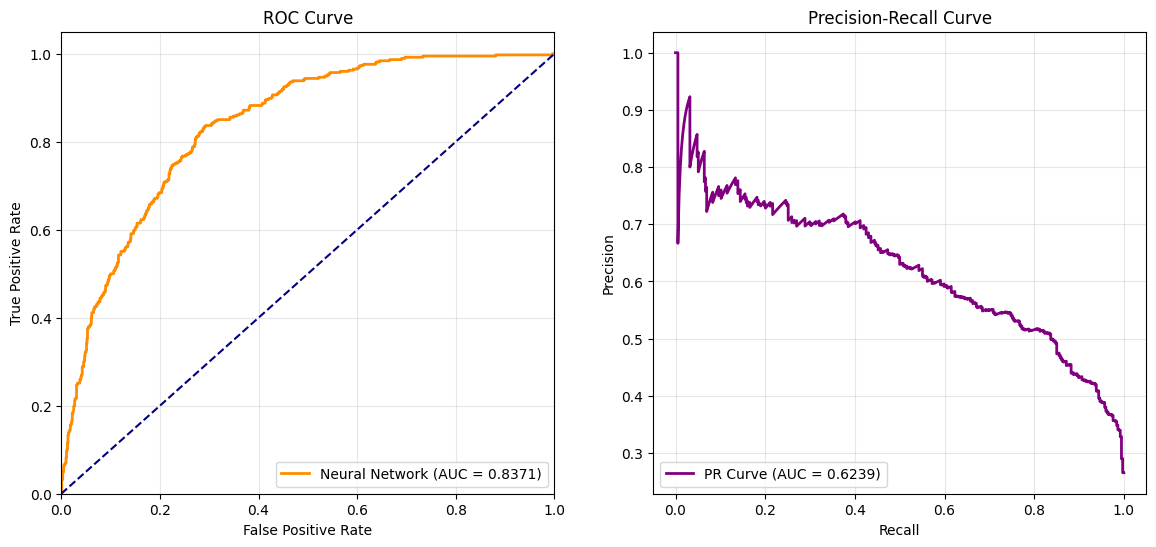

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Curve 1: ROC Curve (The Standard)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'Neural Network (AUC = {roc_auc:.4f})')
ax1.plot([0, 1], [0, 1], color='navy', linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve')
ax1.legend(loc="lower right")
ax1.grid(True, alpha=0.3)

# Curve 2: Precision-Recall Curve (Better for Imbalanced Data like Churn)
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

ax2.plot(recall, precision, color='purple', lw=2, label=f'PR Curve (AUC = {pr_auc:.4f})')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.legend(loc="lower left")
ax2.grid(True, alpha=0.3)

plt.show()

### ROC-AUC SCORE

In [20]:
print(f"[INFO] Final ROC-AUC Score: {roc_auc:.4f}")

[INFO] Final ROC-AUC Score: 0.8371
